In [1]:
#Importing required packages.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline
import random

C:\Users\brian\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#load the data in text form separated by commas
brainT = np.loadtxt('Braintumor.csv', delimiter = ',', skiprows = 1)

In [3]:
#check the shape
print(brainT.shape)

(3762, 14)


In [4]:
#change the format so calculations and reading are easier
np.set_printoptions(formatter = {'float': '{: 0.1f}'.format})

In [5]:
# Shuffle the datasets
import random
brainT 
np.random.shuffle(brainT)
print(brainT)

[[ 0.0  3.7  296.0 ...  5.8  1.0  0.0]
 [ 0.0  13.1  887.5 ...  3.7  1.0  0.0]
 [ 1.0  2.8  459.8 ...  6.5  1.0  0.0]
 ...
 [ 1.0  6.0  1038.6 ...  6.7  1.0  0.0]
 [ 1.0  1.5  193.3 ...  5.4  1.0  0.0]
 [ 1.0  9.2  796.0 ...  6.4  1.0  0.0]]


In [6]:
#Dropping everything below 60% accuracy
brainT = np.delete(brainT, 13, axis = 1)
brainT = np.delete(brainT, 12, axis = 1)
brainT = np.delete(brainT, 7, axis = 1)
brainT = np.delete(brainT, 3, axis = 1)
brainT = np.delete(brainT, 2, axis = 1)
brainT = np.delete(brainT, 1, axis = 1)
print(brainT)

[[ 0.0  0.1  5.5 ...  0.1  0.5  5.8]
 [ 0.0  0.2  2.7 ...  0.2  0.6  3.7]
 [ 1.0  0.0  8.2 ...  0.0  0.3  6.5]
 ...
 [ 1.0  0.0  5.8 ...  0.0  0.4  6.7]
 [ 1.0  0.0  9.6 ...  0.0  0.3  5.4]
 [ 1.0  0.0  4.1 ...  0.0  0.3  6.4]]


In [7]:
# Split into training and validation, 30% validation set and 70% training 
index_30percent = int(0.3 * len(brainT[:, 0]))
print(index_30percent)
XVALID = brainT[:index_30percent, 1:]
YVALID = brainT[:index_30percent, :1]
XTRAIN = brainT[index_30percent:, 1:]
YTRAIN = brainT[index_30percent:, :1]

1128


In [8]:
#import tensorflow for neuron netowrk
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint

In [9]:
#build model for Training
model = Sequential()
model.add(Dense(4, input_dim = len(XTRAIN[0, :]), activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

Epoch 1/500
83/83 [==============================] - 3s 13ms/step - loss: 3.3182 - accuracy: 0.5372 - val_loss: 2.1885 - val_accuracy: 0.5656
Epoch 2/500
83/83 [==============================] - 1s 7ms/step - loss: 1.9315 - accuracy: 0.4408 - val_loss: 1.3881 - val_accuracy: 0.4069
Epoch 3/500
83/83 [==============================] - 0s 6ms/step - loss: 1.2376 - accuracy: 0.4476 - val_loss: 0.9484 - val_accuracy: 0.5053
Epoch 4/500
83/83 [==============================] - 0s 6ms/step - loss: 0.8749 - accuracy: 0.5592 - val_loss: 0.7550 - val_accuracy: 0.6232
Epoch 5/500
83/83 [==============================] - 0s 6ms/step - loss: 0.7338 - accuracy: 0.6245 - val_loss: 0.6750 - val_accuracy: 0.6613
Epoch 6/500
83/83 [==============================] - 0s 6ms/step - loss: 0.6787 - accuracy: 0.6632 - val_loss: 0.6522 - val_accuracy: 0.6844
Epoch 7/500
83/83 [==============================] - 0s 6ms/step - loss: 0.6593 - accuracy: 0.6948 - val_loss: 0.6334 - val_accuracy: 0.7225
Epoch 8/500


Epoch 59/500
83/83 [==============================] - 1s 7ms/step - loss: 0.1079 - accuracy: 0.9715 - val_loss: 0.0978 - val_accuracy: 0.9725
Epoch 60/500
83/83 [==============================] - 1s 7ms/step - loss: 0.1044 - accuracy: 0.9734 - val_loss: 0.0935 - val_accuracy: 0.9752
Epoch 61/500
83/83 [==============================] - 1s 8ms/step - loss: 0.1013 - accuracy: 0.9734 - val_loss: 0.0927 - val_accuracy: 0.9761
Epoch 62/500
83/83 [==============================] - 1s 8ms/step - loss: 0.1001 - accuracy: 0.9730 - val_loss: 0.0975 - val_accuracy: 0.9752
Epoch 63/500
83/83 [==============================] - 1s 8ms/step - loss: 0.1025 - accuracy: 0.9727 - val_loss: 0.0899 - val_accuracy: 0.9752
Epoch 64/500
83/83 [==============================] - 1s 6ms/step - loss: 0.0999 - accuracy: 0.9723 - val_loss: 0.0868 - val_accuracy: 0.9761
Epoch 65/500
83/83 [==============================] - 1s 6ms/step - loss: 0.0977 - accuracy: 0.9738 - val_loss: 0.0951 - val_accuracy: 0.9725
Epoch 

83/83 [==============================] - 1s 6ms/step - loss: 0.0832 - accuracy: 0.9749 - val_loss: 0.0687 - val_accuracy: 0.9778
Epoch 117/500
83/83 [==============================] - 1s 6ms/step - loss: 0.0800 - accuracy: 0.9749 - val_loss: 0.0720 - val_accuracy: 0.9787
Epoch 118/500
83/83 [==============================] - 1s 6ms/step - loss: 0.0814 - accuracy: 0.9761 - val_loss: 0.0712 - val_accuracy: 0.9761
Epoch 119/500
83/83 [==============================] - 0s 6ms/step - loss: 0.0791 - accuracy: 0.9765 - val_loss: 0.0738 - val_accuracy: 0.9805
Epoch 120/500
83/83 [==============================] - 0s 6ms/step - loss: 0.0791 - accuracy: 0.9757 - val_loss: 0.0720 - val_accuracy: 0.9770
Epoch 121/500
83/83 [==============================] - 1s 6ms/step - loss: 0.0780 - accuracy: 0.9765 - val_loss: 0.0712 - val_accuracy: 0.9796
Epoch 122/500
83/83 [==============================] - 0s 6ms/step - loss: 0.0823 - accuracy: 0.9753 - val_loss: 0.0705 - val_accuracy: 0.9778
Epoch 123/500

83/83 [==============================] - 1s 9ms/step - loss: 0.0794 - accuracy: 0.9757 - val_loss: 0.0670 - val_accuracy: 0.9778
Epoch 174/500
83/83 [==============================] - 1s 9ms/step - loss: 0.0816 - accuracy: 0.9757 - val_loss: 0.0650 - val_accuracy: 0.9814
Epoch 175/500
83/83 [==============================] - 1s 8ms/step - loss: 0.0807 - accuracy: 0.9768 - val_loss: 0.0657 - val_accuracy: 0.9787
Epoch 176/500
83/83 [==============================] - 1s 9ms/step - loss: 0.0771 - accuracy: 0.9761 - val_loss: 0.0671 - val_accuracy: 0.9770
Epoch 177/500
83/83 [==============================] - 1s 8ms/step - loss: 0.0774 - accuracy: 0.9768 - val_loss: 0.0694 - val_accuracy: 0.9770
Epoch 178/500
83/83 [==============================] - 1s 10ms/step - loss: 0.0806 - accuracy: 0.9746 - val_loss: 0.0682 - val_accuracy: 0.9770
Epoch 179/500
83/83 [==============================] - 1s 10ms/step - loss: 0.0810 - accuracy: 0.9761 - val_loss: 0.0660 - val_accuracy: 0.9778
Epoch 180/5

83/83 [==============================] - 1s 7ms/step - loss: 0.0771 - accuracy: 0.9765 - val_loss: 0.0691 - val_accuracy: 0.9770
Epoch 231/500
83/83 [==============================] - 1s 7ms/step - loss: 0.0757 - accuracy: 0.9772 - val_loss: 0.0736 - val_accuracy: 0.9805
Epoch 232/500
83/83 [==============================] - 0s 6ms/step - loss: 0.0780 - accuracy: 0.9765 - val_loss: 0.0713 - val_accuracy: 0.9805
Epoch 233/500
83/83 [==============================] - 0s 6ms/step - loss: 0.0777 - accuracy: 0.9768 - val_loss: 0.0678 - val_accuracy: 0.9805
Epoch 234/500
83/83 [==============================] - 0s 6ms/step - loss: 0.0777 - accuracy: 0.9761 - val_loss: 0.0679 - val_accuracy: 0.9778
Epoch 235/500
83/83 [==============================] - 0s 5ms/step - loss: 0.0783 - accuracy: 0.9768 - val_loss: 0.0712 - val_accuracy: 0.9778
Epoch 236/500
83/83 [==============================] - 0s 6ms/step - loss: 0.0758 - accuracy: 0.9768 - val_loss: 0.0656 - val_accuracy: 0.9770
Epoch 237/500

83/83 [==============================] - 1s 7ms/step - loss: 0.0817 - accuracy: 0.9780 - val_loss: 0.0633 - val_accuracy: 0.9805
Epoch 288/500
83/83 [==============================] - 1s 6ms/step - loss: 0.0770 - accuracy: 0.9784 - val_loss: 0.0633 - val_accuracy: 0.9787
Epoch 289/500
83/83 [==============================] - 0s 6ms/step - loss: 0.0787 - accuracy: 0.9768 - val_loss: 0.0657 - val_accuracy: 0.9770
Epoch 290/500
83/83 [==============================] - 1s 6ms/step - loss: 0.0779 - accuracy: 0.9761 - val_loss: 0.0660 - val_accuracy: 0.9761
Epoch 291/500
83/83 [==============================] - 1s 7ms/step - loss: 0.0773 - accuracy: 0.9765 - val_loss: 0.0707 - val_accuracy: 0.9778
Epoch 292/500
83/83 [==============================] - 1s 7ms/step - loss: 0.0771 - accuracy: 0.9776 - val_loss: 0.0669 - val_accuracy: 0.9761
Epoch 293/500
83/83 [==============================] - 1s 8ms/step - loss: 0.0759 - accuracy: 0.9776 - val_loss: 0.0637 - val_accuracy: 0.9814
Epoch 294/500

83/83 [==============================] - 1s 8ms/step - loss: 0.0758 - accuracy: 0.9772 - val_loss: 0.0630 - val_accuracy: 0.9796
Epoch 345/500
83/83 [==============================] - 1s 8ms/step - loss: 0.0767 - accuracy: 0.9784 - val_loss: 0.0690 - val_accuracy: 0.9770
Epoch 346/500
83/83 [==============================] - 1s 9ms/step - loss: 0.0760 - accuracy: 0.9780 - val_loss: 0.0649 - val_accuracy: 0.9787
Epoch 347/500
83/83 [==============================] - 1s 8ms/step - loss: 0.0794 - accuracy: 0.9768 - val_loss: 0.0626 - val_accuracy: 0.9823
Epoch 348/500
83/83 [==============================] - 1s 11ms/step - loss: 0.0786 - accuracy: 0.9761 - val_loss: 0.0675 - val_accuracy: 0.9778
Epoch 349/500
83/83 [==============================] - 1s 8ms/step - loss: 0.0750 - accuracy: 0.9780 - val_loss: 0.0655 - val_accuracy: 0.9778
Epoch 350/500
83/83 [==============================] - 1s 9ms/step - loss: 0.0759 - accuracy: 0.9780 - val_loss: 0.0647 - val_accuracy: 0.9787
Epoch 351/50

83/83 [==============================] - 1s 7ms/step - loss: 0.0750 - accuracy: 0.9780 - val_loss: 0.0631 - val_accuracy: 0.9796
Epoch 402/500
83/83 [==============================] - 1s 7ms/step - loss: 0.0763 - accuracy: 0.9768 - val_loss: 0.0662 - val_accuracy: 0.9814
Epoch 403/500
83/83 [==============================] - 1s 6ms/step - loss: 0.0746 - accuracy: 0.9776 - val_loss: 0.0673 - val_accuracy: 0.9814
Epoch 404/500
83/83 [==============================] - 1s 7ms/step - loss: 0.0767 - accuracy: 0.9761 - val_loss: 0.0622 - val_accuracy: 0.9823
Epoch 405/500
83/83 [==============================] - 1s 7ms/step - loss: 0.0809 - accuracy: 0.9768 - val_loss: 0.0637 - val_accuracy: 0.9778
Epoch 406/500
83/83 [==============================] - 1s 6ms/step - loss: 0.0777 - accuracy: 0.9772 - val_loss: 0.0644 - val_accuracy: 0.9787
Epoch 407/500
83/83 [==============================] - 0s 6ms/step - loss: 0.0773 - accuracy: 0.9776 - val_loss: 0.0640 - val_accuracy: 0.9770
Epoch 408/500

83/83 [==============================] - 1s 7ms/step - loss: 0.0756 - accuracy: 0.9780 - val_loss: 0.0645 - val_accuracy: 0.9787
Epoch 459/500
83/83 [==============================] - 1s 7ms/step - loss: 0.0756 - accuracy: 0.9787 - val_loss: 0.0643 - val_accuracy: 0.9778
Epoch 460/500
83/83 [==============================] - 1s 6ms/step - loss: 0.0753 - accuracy: 0.9780 - val_loss: 0.0647 - val_accuracy: 0.9814
Epoch 461/500
83/83 [==============================] - 1s 7ms/step - loss: 0.0762 - accuracy: 0.9768 - val_loss: 0.0621 - val_accuracy: 0.9823
Epoch 462/500
83/83 [==============================] - 1s 7ms/step - loss: 0.0820 - accuracy: 0.9772 - val_loss: 0.0644 - val_accuracy: 0.9778
Epoch 463/500
83/83 [==============================] - 1s 7ms/step - loss: 0.0762 - accuracy: 0.9787 - val_loss: 0.0660 - val_accuracy: 0.9814
Epoch 464/500
83/83 [==============================] - 1s 6ms/step - loss: 0.0762 - accuracy: 0.9768 - val_loss: 0.0622 - val_accuracy: 0.9823
Epoch 465/500

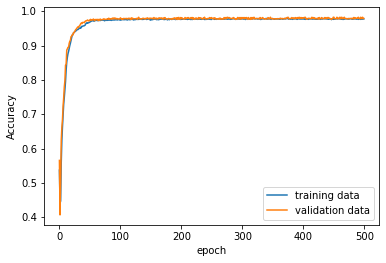

In [10]:
#compile and fit the model with 500 epochs
model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

checkpoint = ModelCheckpoint('N5check.h5', monitor = 'val_accuracy', save_best_only = True, mode = 'max', verbose = 1)

# Do the training (specify the validation set as well)
history = model.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), verbose = 1, epochs = 500)

# Check what's in the history
print(history.params)

# Plot the learning curves (loss/accuracy/MAE)
plt.plot(history.history['accuracy']) # replace with accuracy/MAE
plt.plot(history.history['val_accuracy']) # replace with val_accuracy, etc.
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

In [11]:
accuracy = model.evaluate(XTRAIN, YTRAIN)

83/83 [==============================] - 0s 4ms/step - loss: 0.0734 - accuracy: 0.9791


In [12]:
accuracy = model.evaluate(XVALID, YVALID)

36/36 [==============================] - 0s 4ms/step - loss: 0.0639 - accuracy: 0.9787


In [13]:
print(YTRAIN[:5])
predictions = model.predict(XTRAIN)
print(predictions[:5])

[[ 1.0]
 [ 1.0]
 [ 1.0]
 [ 0.0]
 [ 1.0]]
83/83 [==============================] - 0s 3ms/step
[[ 1.0]
 [ 1.0]
 [ 0.9]
 [ 0.0]
 [ 1.0]]


In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
precision = precision_score(YTRAIN, predictions.round())
print(precision)
recall = recall_score(YTRAIN, predictions.round())
print(recall)
f1 = f1_score(YTRAIN,predictions.round())
print(f1)

0.9841269841269841
0.9703459637561779
0.9771878888428038


In [15]:
print(YVALID[:5])
predictions = model.predict(XVALID)
print(predictions[:5])

[[ 0.0]
 [ 0.0]
 [ 1.0]
 [ 1.0]
 [ 0.0]]
36/36 [==============================] - 0s 3ms/step
[[ 0.2]
 [ 0.0]
 [ 1.0]
 [ 0.0]
 [ 0.1]]


In [16]:
precision = precision_score(YVALID, predictions.round())
print(precision)
recall = recall_score(YVALID, predictions.round())
print(recall)
f1 = f1_score(YVALID,predictions.round())
print(f1)

0.978494623655914
0.9701492537313433
0.9743040685224841
